# Imports

In [1]:
import random

import importlib

import transformations as trans; importlib.reload(trans)
import visualisiations as vis; importlib.reload(vis)
import basic_models; importlib.reload(basic_models)

<module 'basic_models' from 'c:\\Users\\noams\\Python Projects\\Machine Learning Project\\basic_models.py'>

In [ ]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=False, flatten_image=False, use_pca=False)

In [3]:
# get the train images of '9'
sample_space = list(X_train[y_train == 7])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

sample_space = list(X_train[y_train == 2])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

ValueError: not enough values to unpack (expected 2, got 1)

##### is the deskewing function functioning? - NO.

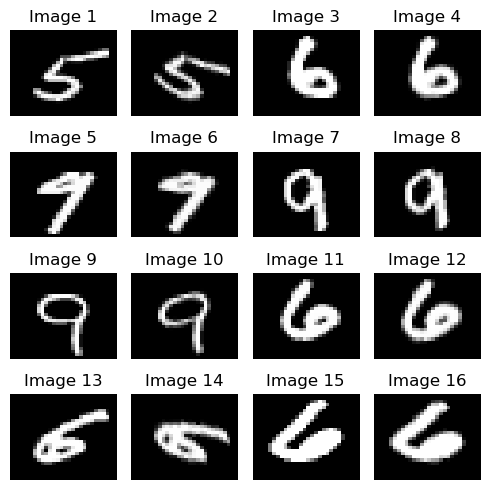

In [ ]:
image_list = random.sample(list(X_train), 8)
vis.plot_before_after_transform(image_list, trans.deskew_image)